In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [7]:
df=pd.read_csv("lifestyle_sustainability_data.csv")

In [6]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [8]:
df.shape

(499, 20)

In [9]:
df.isnull().sum()

,0
ParticipantID,0
Age,0
Location,0
DietType,0
LocalFoodFrequency,0
TransportationMode,0
EnergySource,0
HomeType,0
HomeSize,0
ClothingFrequency,0


In [10]:
df["Location"].value_counts()

,count
Location,
Urban,190
Suburban,156
Rural,153


In [11]:
df["TransportationMode"].value_counts()

,count
TransportationMode,
Car,140
Public Transit,123
Bike,119
Walk,117


In [12]:
df["HomeType"].value_counts()

,count
HomeType,
House,228
Apartment,153
Other,118


In [13]:
df["EnergySource"].value_counts()

,count
EnergySource,
Renewable,183
Mixed,164
Non-Renewable,152


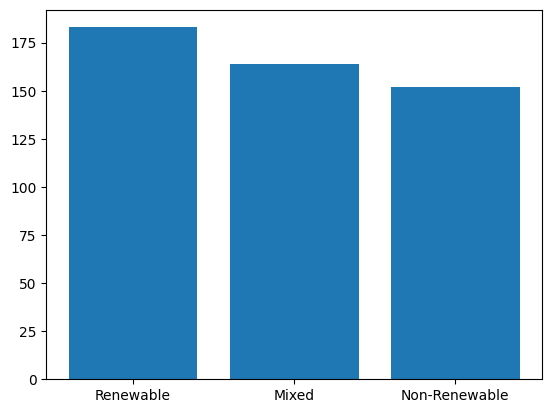

In [14]:
plt.bar(df["EnergySource"].value_counts().index,df["EnergySource"].value_counts())
plt.show()

In [15]:
df["DisposalMethods"].value_counts()

,count
DisposalMethods,
Recycling,145
Landfill,141
Composting,124
Combination,89


In [16]:
df["CommunityInvolvement"].fillna(df["CommunityInvolvement"].mode()[0],inplace=True)
df["PhysicalActivities"].fillna(df["PhysicalActivities"].mode()[0],inplace=True)

/tmp/ipython-input-4273178994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CommunityInvolvement"].fillna(df["CommunityInvolvement"].mode()[0],inplace=True)
/tmp/ipython-input-4273178994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [17]:
df.isnull().sum()

,0
ParticipantID,0
Age,0
Location,0
DietType,0
LocalFoodFrequency,0
TransportationMode,0
EnergySource,0
HomeType,0
HomeSize,0
ClothingFrequency,0


In [18]:
df.columns

Index(['ParticipantID', 'Age', 'Location', 'DietType', 'LocalFoodFrequency',
       'TransportationMode', 'EnergySource', 'HomeType', 'HomeSize',
       'ClothingFrequency', 'SustainableBrands', 'EnvironmentalAwareness',
       'CommunityInvolvement', 'MonthlyElectricityConsumption',
       'MonthlyWaterConsumption', 'Gender', 'UsingPlasticProducts',
       'DisposalMethods', 'PhysicalActivities', 'Rating'],
      dtype='object')

In [19]:
categories={
    'Location':['Urban','Suburban','Rural']
    ,'DietType':['Mostly Plant-Based','Balanced','Mostly Animal-Based']
    ,'LocalFoodFrequency':['Often','Sometimes','Rarely','Always']
    ,'TransportationMode':['Bike','Public Transit','Car','Walk']
    ,'EnergySource':['Renewable','Mixed','Non-Renewable']
    , 'HomeType':['Apartment','House','Other']
    ,'ClothingFrequency':['Rarely','Sometimes','Often','Always']
    ,'CommunityInvolvement':['High','Moderate','Low']
    , 'Gender':['Female','Male','Non-Binary','Prefer not to say']
    , 'UsingPlasticProducts':['Rarely','Sometimes','Often','Never']
    ,'DisposalMethods':['Composting','Recycling','LandFill','Comination']
    , 'PhysicalActivities':['High','Moderate','Low']
}

In [20]:
label_encoder={}
for column,classes in categories.items():
 le=LabelEncoder()
 le.classes=np.array(classes)
 if column in df.columns:
  df[column]=le.fit_transform(df[column])
  label_encoder[column]=le

In [21]:
import joblib
joblib.dump(label_encoder,'label_encoder.joblib')
print("label encoder saved as 'label_encoder.joblib'.")

label encoder saved as 'label_encoder.joblib'.


In [22]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,2,2,1,0,2,0,800,2,True,5,0,100,1500,0,2,1,0,5
1,2,28,1,0,3,2,0,1,1500,3,True,4,2,250,3000,1,3,3,2,4
2,3,65,0,1,2,1,1,1,2500,1,False,2,1,400,4500,1,1,2,1,1
3,4,42,2,2,1,3,2,0,950,3,True,4,2,150,2000,0,2,3,0,5
4,5,31,1,0,3,2,0,1,1800,1,True,3,1,300,3500,2,3,0,2,3


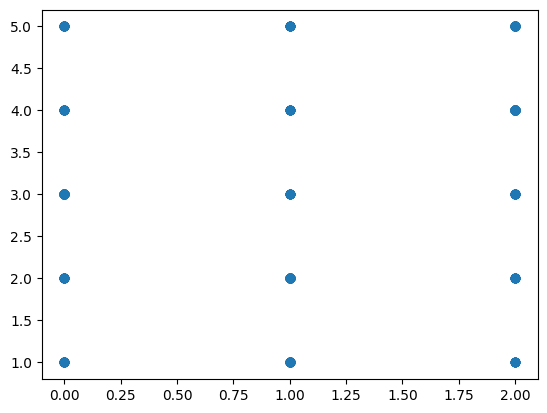

In [23]:
plt.scatter(df["EnergySource"],df['EnvironmentalAwareness'])
plt.show()

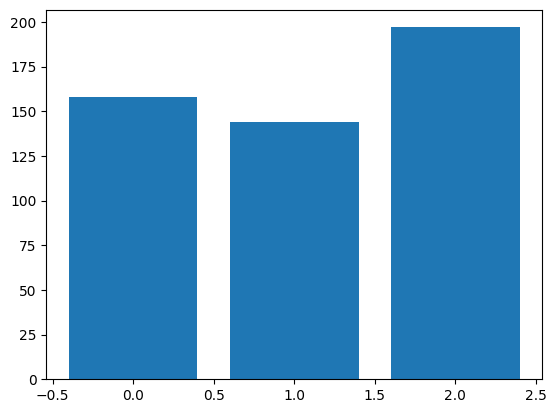

In [24]:
plt.bar(df["DietType"].value_counts().index,df["DietType"].value_counts())
plt.show()

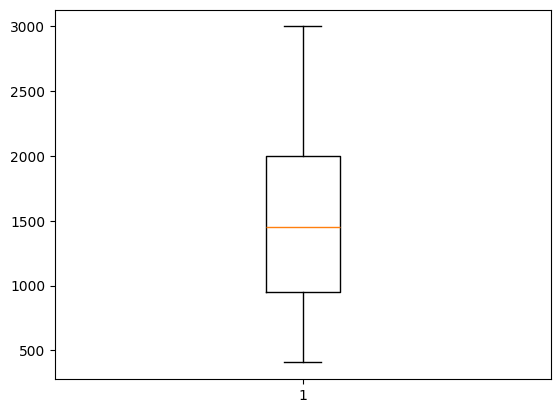

In [25]:
plt.boxplot(df["HomeSize"])
plt.show()

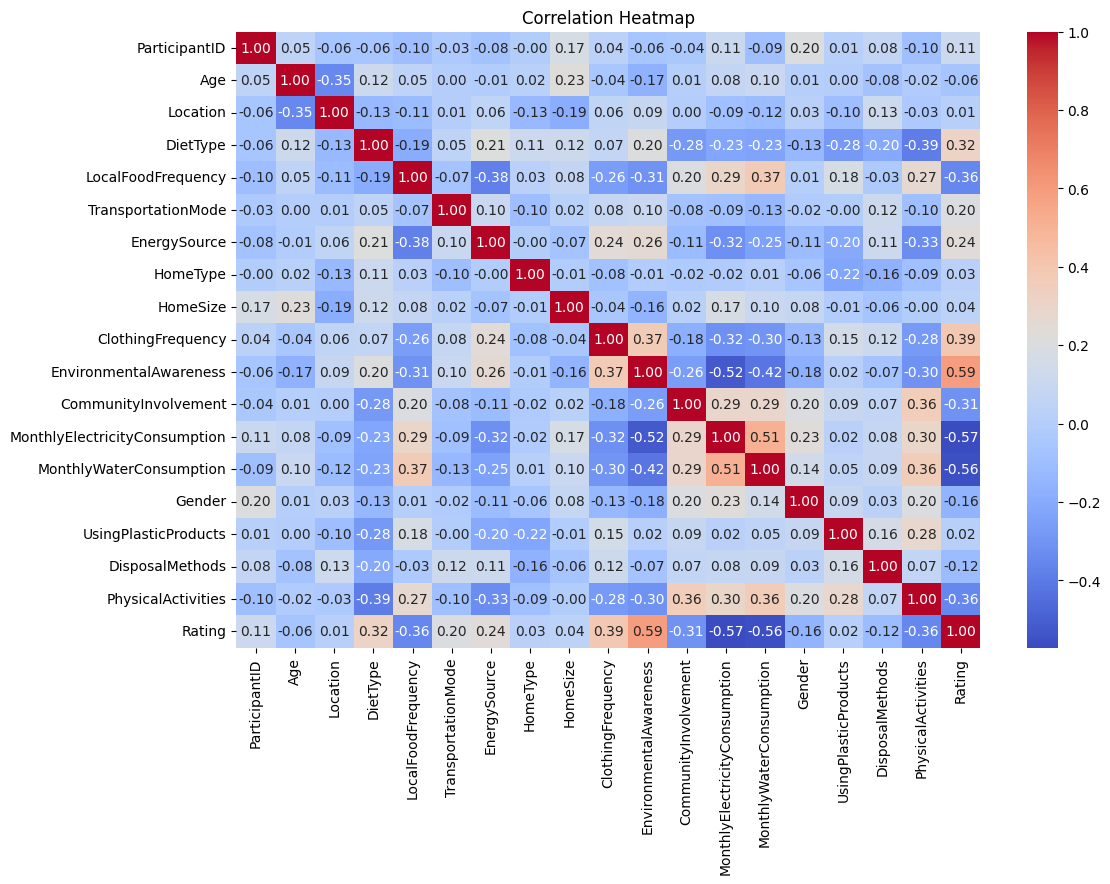

In [26]:
numeric_df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

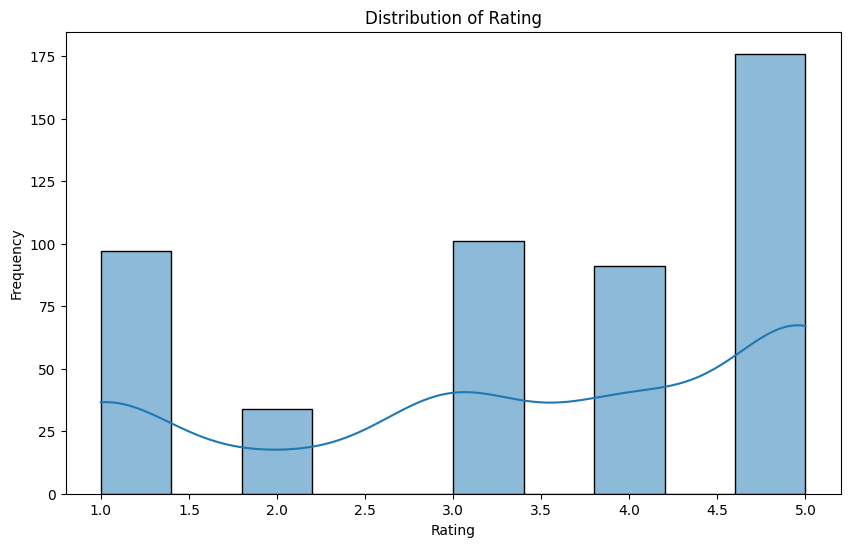

In [27]:
# distribution of rating
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'],bins=10,kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

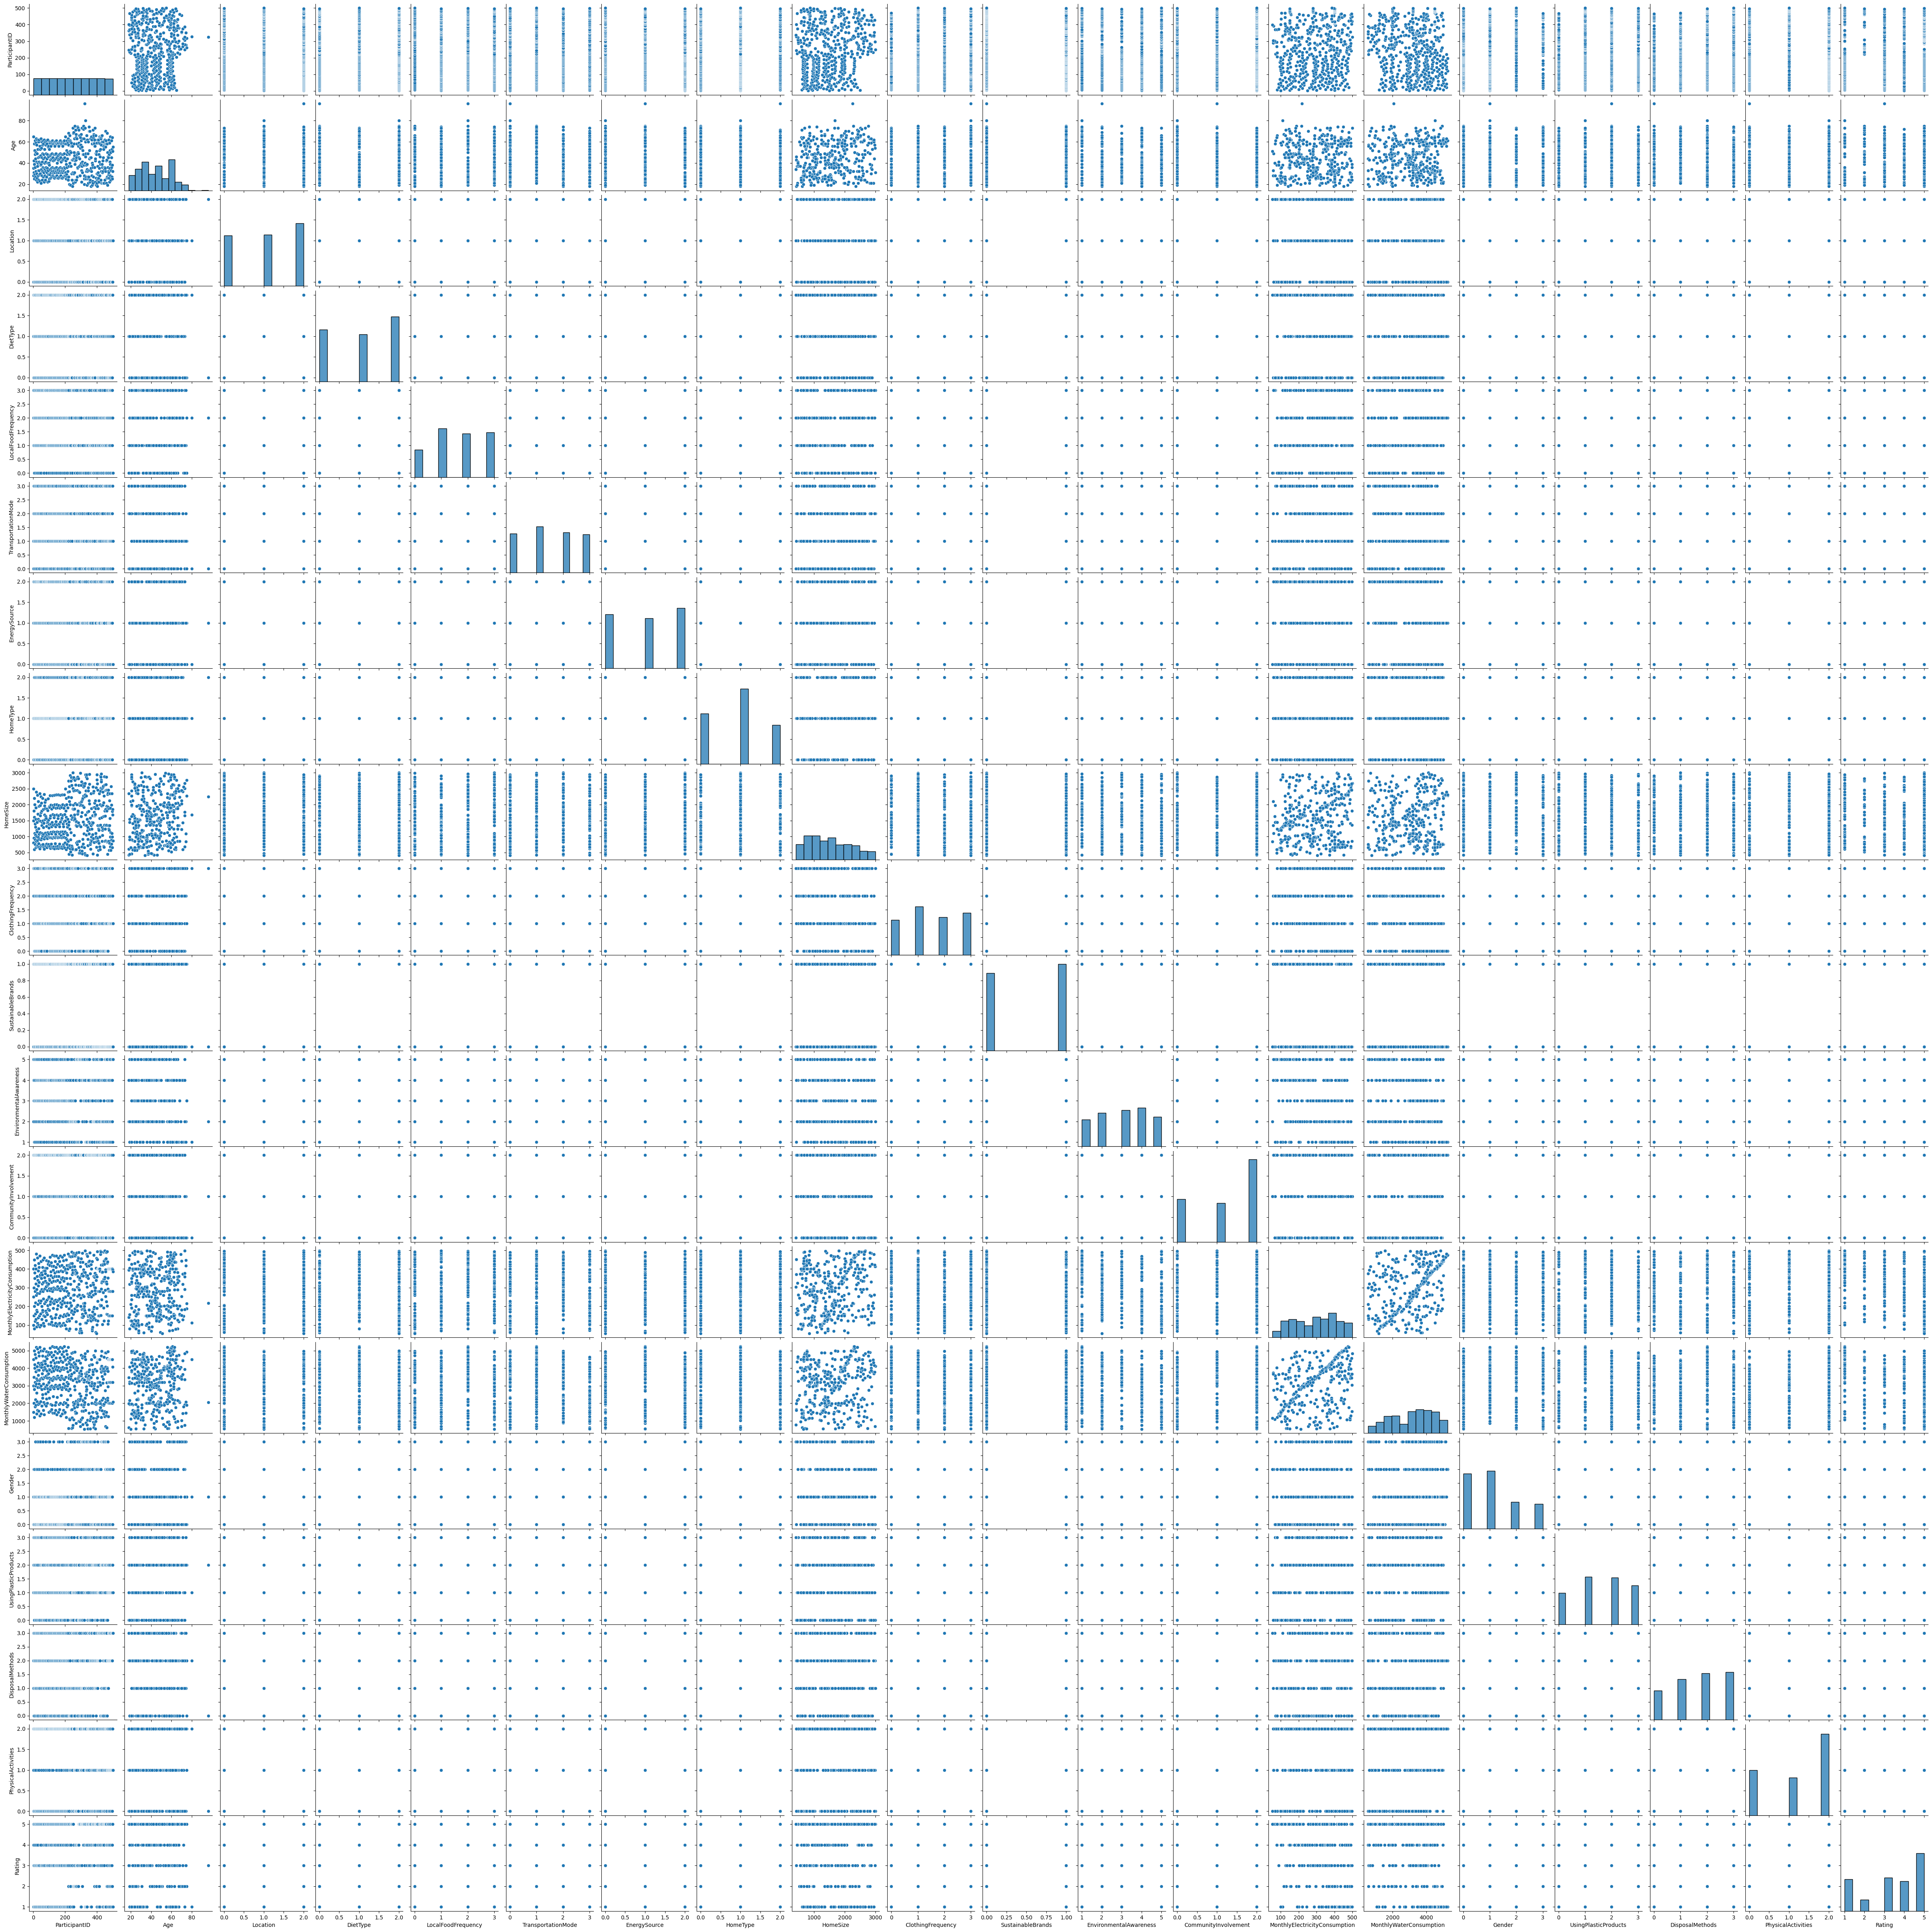

In [37]:
sns.pairplot(df)
plt.show()

In [29]:
x=df.drop(columns=['ParticipantID','Rating'])
y=df['Rating']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [32]:
joblib.dump(scaler,'scaler.joblib')
print("scaler saved as 'scaler.joblib'.")

scaler saved as 'scaler.joblib'.


In [33]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_dt=dt_model.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred_dt)


0.65

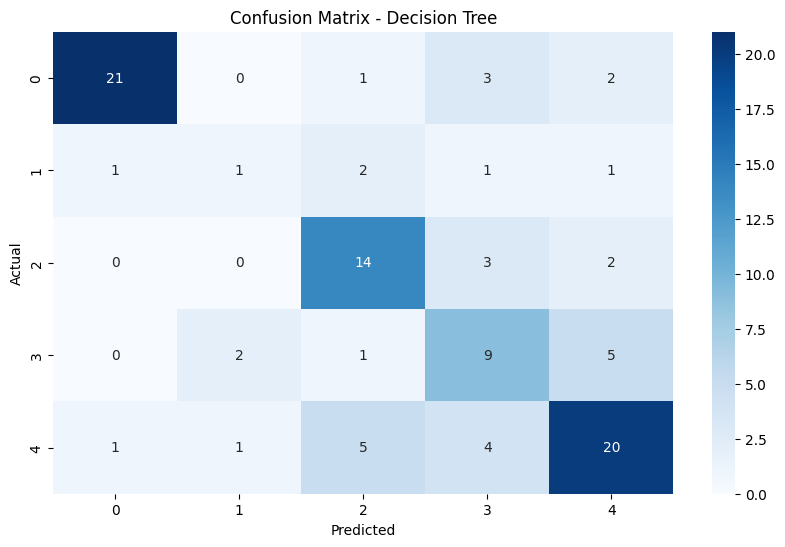

              precision    recall  f1-score   support

           1       0.91      0.78      0.84        27
           2       0.25      0.17      0.20         6
           3       0.61      0.74      0.67        19
           4       0.45      0.53      0.49        17
           5       0.67      0.65      0.66        31

    accuracy                           0.65       100
   macro avg       0.58      0.57      0.57       100
weighted avg       0.66      0.65      0.65       100



In [38]:
cm_dt=confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_dt))

In [39]:
from sklearn.linear_model import LogisticRegression

In [44]:
dt_model1=LogisticRegression(random_state=42)
dt_model1.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [48]:
y_pred_dt2=dt_model1.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred_dt2)

0.61

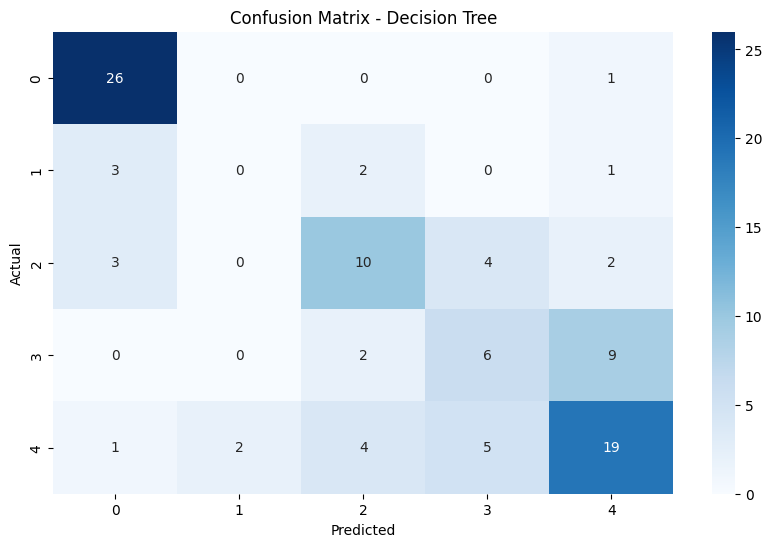

              precision    recall  f1-score   support

           1       0.79      0.96      0.87        27
           2       0.00      0.00      0.00         6
           3       0.56      0.53      0.54        19
           4       0.40      0.35      0.38        17
           5       0.59      0.61      0.60        31

    accuracy                           0.61       100
   macro avg       0.47      0.49      0.48       100
weighted avg       0.57      0.61      0.59       100



In [50]:
cm_dt=confusion_matrix(y_test,y_pred_dt2)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_dt2))

In [51]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred_dt3=rf_model.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred_dt3)

0.74

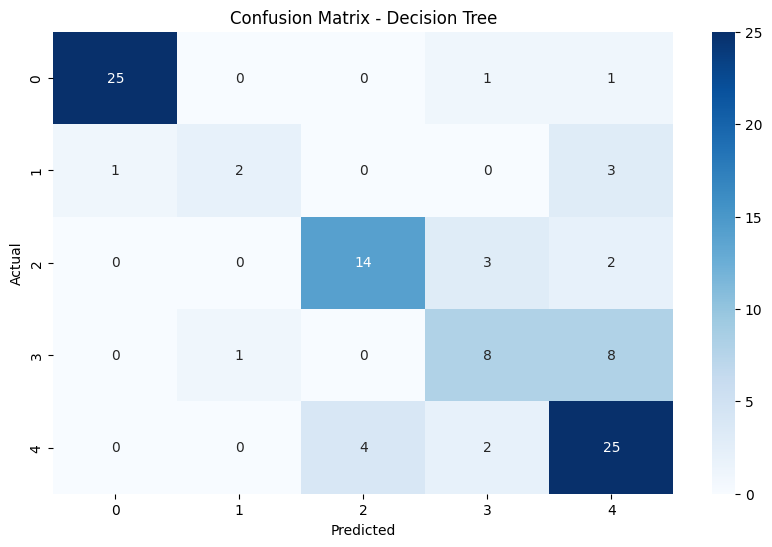

              precision    recall  f1-score   support

           1       0.96      0.93      0.94        27
           2       0.67      0.33      0.44         6
           3       0.78      0.74      0.76        19
           4       0.57      0.47      0.52        17
           5       0.64      0.81      0.71        31

    accuracy                           0.74       100
   macro avg       0.72      0.65      0.68       100
weighted avg       0.74      0.74      0.73       100



In [55]:
cm_dt=confusion_matrix(y_test,y_pred_dt3)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_dt3))

In [77]:
param_grid={
    'n-estimators':[50,100,150],
    'max-depth':[None,10,20],
    'min_sample_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)
print('Best Hyperparameters for Random Forest:', grid_search.best_params_)

In [83]:
y_pred_best_rf=gird_search.best_estimator_.predict(x_test)
print("tuned random forest accuracy:",accuracy_score(y_test,y_pred_best_rf))

tuned random forest accuracy: 0.75


In [84]:
import joblib
best_model=grid_search.best_estimator_
joblib.dump(best_model,'best_model.joblib')
print("best model saved as 'best_model.joblib'.")

best model saved as 'best_model.joblib'.
